## Compute saliency of objects from visual scenes


In [30]:
# Importing libraries

import string
import re
import nltk
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import operator

In [47]:
def get_dataset(path):
    """Gets and returns objects from all houses of the MP3D dataset.
    
    Parameters
    ----------
    path : str
        Path to the list of objects text file.
        
    Returns
    -------
    dataset : str
        A corpus of objects.
    """

    dataset = []
    text_data = []
    with open(path) as text_file:
        text_data = text_file.read()
    text_data = text_data.split(",")
    
    for item in text_data:
        
        # Removing punctuation
        table = str.maketrans(dict.fromkeys(string.punctuation))
        item = item.translate(table)
        
        # Cleaning backslashes 
        item = re.sub('(?:\\n|\\|\/)', ' ', item.strip())
        
        # Spliting when two objects are in one string
        if ' ' in item:
            item = item.split()
            dataset.append(item[0])
            dataset.append(item[1])
        else:
            dataset.append(item)
            
    # Removing empty strings
    dataset = [x for x in dataset if x]
    
    return dataset

dataset = get_dataset('list_objects.txt')
dataset

['ceiling',
 'wall',
 'wall',
 'door',
 'door',
 'wall',
 'window',
 'beam',
 'floor',
 'lighting',
 'wall',
 'misc',
 'door',
 'door',
 'window',
 'tvmonitor',
 'beam',
 'window',
 'door',
 'beam',
 'picture',
 'door',
 'window',
 'window',
 'lighting',
 'window',
 'window',
 'door',
 'lighting',
 'window',
 'cabinet',
 'sofa',
 'table',
 'chair',
 'chair',
 'chair',
 'table',
 'chair',
 'chair',
 'furniture',
 'chair',
 'table',
 'objects',
 'cushion',
 'cushion',
 'cushion',
 'cushion',
 'ceiling',
 'wall',
 'wall',
 'misc',
 'wall',
 'fireplace',
 'door',
 'window',
 'misc',
 'door',
 'chair',
 'sofa',
 'table',
 'door',
 'floor',
 'plant',
 'window',
 'chair',
 'chair',
 'cabinet',
 'window',
 'table',
 'plant',
 'window',
 'chair',
 'window',
 'lighting',
 'window',
 'table',
 'window',
 'table',
 'plant',
 'table',
 'table',
 'wall',
 'wall',
 'chair',
 'wall',
 'ceiling',
 'misc',
 'floor',
 'objects',
 'cabinet',
 'door',
 'chair',
 'table',
 'column',
 'door',
 'chair',
 'cha

In [48]:
def show_frequency(dataset, nb_sample, title, x_label):
    """Shows most frequent nouns in dataset as a figure
    and returns frequency of nouns from the dataset.
    
    Parameters
    ----------
    dataset : list
        List of nouns.
    nb_sample: int
        Number maximum of nouns to show.
        
    Returns
    -------
    noun_frequency : dict
        List of nouns.
    """
    dict_frequency = Counter(dataset)
    noun_frequency = sorted(dict_frequency.items(), key=operator.itemgetter(1), reverse=True)
    
    # Showing figure
    fd = nltk.FreqDist(dataset).most_common(nb_sample)
    all_fdist = pd.Series(dict(fd))
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title,fontweight="bold", size=20) # Title
    ax.set_ylabel('Number of occurences', fontsize = 20.0) # Y label
    ax.set_xlabel(x_label, fontsize = 20) # X label
    all_plot = seaborn.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30);
    
    return noun_frequency

Stored 'obj_frequency' (list)


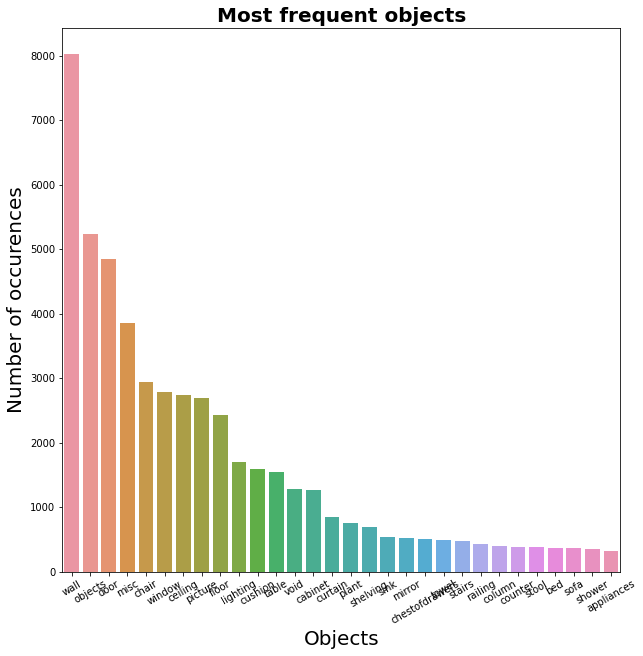

In [49]:
obj_frequency = show_frequency(dataset, 30, "Most frequent objects", "Objects")
%store obj_frequency

In [50]:
obj_frequency

[('wall', 8025),
 ('objects', 5226),
 ('door', 4839),
 ('misc', 3847),
 ('chair', 2941),
 ('window', 2777),
 ('ceiling', 2739),
 ('picture', 2689),
 ('floor', 2435),
 ('lighting', 1699),
 ('cushion', 1591),
 ('table', 1546),
 ('void', 1283),
 ('cabinet', 1264),
 ('curtain', 845),
 ('plant', 760),
 ('shelving', 699),
 ('sink', 543),
 ('mirror', 523),
 ('chestofdrawers', 502),
 ('towel', 489),
 ('stairs', 470),
 ('railing', 424),
 ('column', 393),
 ('counter', 380),
 ('stool', 375),
 ('bed', 365),
 ('sofa', 360),
 ('shower', 344),
 ('appliances', 320),
 ('toilet', 290),
 ('tvmonitor', 283),
 ('seating', 246),
 ('clothes', 178),
 ('fireplace', 139),
 ('beam', 128),
 ('bathtub', 127),
 ('furniture', 115),
 ('gymequipment', 80),
 ('blinds', 48),
 ('boardpanel', 33)]